# Numerical and Automatic Derivatives

Derivatives are fundamental in mathematical modeling.
They provide essential insights into the behavior of physical systems by quantifying rates of change.

In fields such as computational physics, engineering, and machine learning, the efficient and accurate computation of derivatives is crucial for simulations, optimizations, and analyses.
Traditional analytical methods for finding derivatives may become intractable for complex or nonlinear functions commonly encountered in real-world applications.
Consequently, alternative techniques have emerged as indispensable tools in scientific computing.

The derivative of a real-valued function $f(x)$ at a point $x = a$ is defined as the limit:
\begin{align}
f'(a) = \lim_{h \to 0} \frac{f(a + h) - f(a)}{h}.
\end{align}
This limit, if it exists, represents the slope of the tangent line to the curve $y = f(x)$ at $x = a$. The derivative function $f'(x)$ provides the rate of change of $f$ at any point within its domain where the derivative exists.

Several fundamental rules facilitating the computation of derivatives are taught in undergraduate calculus courses.
Among them, the most important one is the chain rule.
It states that, for $f(x) = g(h(x))$, its derivative is given by
\begin{align}
f'(x) = g'(h(x)) h'(x).
\end{align}
We will show that the chain rule is extremely important in modern numerical and automatic derivatives.

Methods for computing derivatives include symbolic differentiation, numerical approximation, and automatic differentiation.
Symbolic differentiation applies analytical rules directly to mathematical expressions, yielding exact derivative formulas.
Numerical methods, such as finite difference techniques, approximate derivatives using discrete data points and are straightforward to implement but may suffer from truncation and round-off errors.
Automatic differentiation bridges the gap by systematically applying the chain rule to compute exact derivatives up to machine precision without symbolic manipulation, making it efficient for complex functions and large-scale systems.

Understanding the principles, advantages, and limitations of these approaches allows for the selection of the most appropriate method for a given problem.
This lecture will introduce these techniques, providing a comprehensive overview of their theoretical foundations and practical implementations in computational contexts.

## Symbolic Differentiation

Symbolic differentiation computes the derivative of a function expressed symbolically by applying calculus rules directly to its mathematical expression.
Unlike numerical methods that approximate derivatives at specific points, symbolic differentiation yields exact analytical expressions, making it valuable for theoretical analyses and precise computations.

### Algorithmic Approach

The general algorithm for symbolic differentiation involves:

1. Parsing the Expression: Represent the function as an expression tree, where each node corresponds to an operation (e.g., addition, multiplication) or operand (e.g., variable, constant).
2. Applying Differentiation Rules: Recursively apply differentiation rules to each node in the expression tree, including the chain rule.
3. Simplifying the Result: After applying the differentiation rules, simplify the resulting expression to make it more readable and computationally efficient.

Consider the function $f(x) = x^2 \sin(x) + e^{2x}$.
To compute $f'(x)$, a symbolic differentiation system would:
1. Differentiate $x^2 \sin(x)$ using the product rule:
   \begin{align}
   \frac{d}{dx}[x^2 \sin(x)] = x^2 \cos(x) + 2 x \sin(x)
   \end{align}
2. Differentiate $e^{2x}$ using the chain rule:
   \begin{align}
   \frac{d}{dx}[e^{2x}] = 2 e^{2x}
   \end{align}
3. Combine the results:
   \begin{align}
   f'(x) = x^2 \cos(x) + 2 x \sin(x) + 2 e^{2x}
   \end{align}

### Symbolic Computation with SymPy

`SymPy` is an open-source Python library for symbolic mathematics.
It allows for symbolic differentiation and manipulation of mathematical expressions.

Using `SymPy` to Compute $f'(x)$:

In [1]:
!pip install sympy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import sympy as sp

x = sp.symbols('x')
f = x**2 * sp.sin(x) + sp.exp(2 * x)
f_prime = sp.diff(f, x)
f_prime_simplified = sp.simplify(f_prime)

In [6]:
f_prime

x**2*cos(x) + 2*x*sin(x) + 2*exp(2*x)

In [5]:
f_prime_simplified

x**2*cos(x) + 2*x*sin(x) + 2*exp(2*x)

In [7]:
g = x**2 * sp.sin(x) + sp.exp(2 * x)
g_prime = sp.diff(g, x)
g_prime_simplified = sp.simplify(g_prime)

### Advantages of Symbolic Differentiation

Symbolic differentiation provides exact results by producing precise analytical expressions without approximation errors.
This exactness is crucial in theoretical work where precise solutions are necessary.
Additionally, symbolic derivatives are valid over continuous ranges of variables, offering general applicability in analyses.
They facilitate further analytical processes by simplifying tasks such as solving differential equations and optimizing functions, as the exact expressions can be manipulated algebraically to gain deeper insights into the behavior of the system under study.

### Limitations

Symbolic differentiation has limitations that can impact its practicality.
One challenge is the potential for expression growth of the derivative expressions as the original function's complexity increases.
This growth can make the expressions difficult to interpret and computationally intensive to process.
The computational complexity associated with differentiating complex functions can require substantial resources and time, especially for high-dimensional systems or functions involving intricate compositions.
Furthermore, symbolic differentiation is not suitable for functions without explicit symbolic forms, such as those defined by experimental data, simulations, or complex numerical algorithms.
In such cases, alternative methods like numerical differentiation or automatic differentiation are more appropriate.

### Software Tools

Several software tools facilitate symbolic differentiation by automating the application of calculus rules to mathematical expressions:

* [`SymPy`](https://www.sympy.org/):
  An open-source Python library that provides capabilities for symbolic differentiation, integration, and equation solving within the Python ecosystem.
* [`Mathematica`](https://www.wolfram.com/mathematica/):
  A computational software developed by Wolfram Research, offering extensive symbolic computation features used widely in academia and industry.
* [`Maple`](https://www.maplesoft.com/):
  A software package designed for symbolic and numeric computing, providing powerful tools for mathematical analysis.
* [`Maxima`](https://maxima.sourceforge.io/):
  An open-source computer algebra system specializing in symbolic manipulation, accessible for users seeking free alternatives.

## Numerical Differentiation

Numerical differentiation estimates the derivative of a function using discrete data points, providing approximate values where analytical derivatives are difficult or impossible to obtain.
Unlike symbolic differentiation, which yields exact expressions, numerical methods offer flexibility in handling complex, empirical, or high-dimensional functions by leveraging computational algorithms to approximate derivatives at specific points.

### Finite Difference Methods

Finite difference methods are fundamental techniques in numerical differentiation, estimating derivatives by evaluating the function at specific points and computing the ratio of differences.
These methods are essential when analytical derivatives are difficult or impossible to obtain, particularly for complex or empirical functions encountered in scientific and engineering applications.

The core idea behind finite difference methods is to approximate the derivative $f'(x)$ by evaluating the function $f(x)$ at selected points around $x$.
The three most basic finite difference approximations are forward difference, backward difference, and central difference.

The **forward difference approximation** estimates the first derivative at a point $x$ by using the function values at $x$ and $x + h$, where $h$ is a small step size:
\begin{align}
f'(x) \approx \frac{f(x + h) - f(x)}{h}.
\end{align}
This method is straightforward to implement and requires only one additional function evaluation beyond the point of interest.
However, its accuracy is limited by a truncation error of order $\mathcal{O}(h)$.
As $h$ decreases, the approximation becomes more accurate, but excessively small values of $h$ can lead to significant round-off errors due to the limitations of floating-point arithmetic.

Similarly, the **backward difference approximation** estimates the derivative using the function values at $x$ and $x - h$:
\begin{align}
f'(x) \approx \frac{f(x) - f(x - h)}{h}.
\end{align}
Like the forward difference, the backward difference method has the same truncation error of $\mathcal{O}(h)$.
It is particularly useful in situations where function evaluations at points greater than $x$ are not available or are computationally expensive.

The **central difference approximation** provides a more accurate estimate by averaging the forward and backward differences:
\begin{align}
f'(x) \approx \frac{1}{2}\left[\frac{f(x + h) - f(x)}{h} + \frac{f(x) - f(x - h)}{h}\right] = \frac{f(x + h) - f(x - h)}{2h}.
\end{align}
This method reduces the truncation error to $\mathcal{O}(h^2)$, making it  more accurate for smooth functions.
The central difference requires function evaluations at both $x + h$ and $x - h$, effectively doubling the number of required computations compared to the forward or backward methods.
Nevertheless, the enhanced accuracy often justifies the additional computational effort, especially in applications demanding high precision.

Finite difference methods involve a trade-off between truncation error and round-off error.
The truncation error arises from approximating the derivative using discrete differences, while the round-off error is due to the finite precision of floating-point arithmetic used in computations.

For the forward and backward difference methods, the truncation error is proportional to $h$, meaning that decreasing $h$ improves the approximation's accuracy linearly.
In contrast, the central difference method's truncation error decreases quadratically with $h$, offering better accuracy for smaller step sizes.

However, reducing $h$ too much can amplify round-off errors, as the difference $f(x + h) - f(x)$ becomes dominated by floating-point precision limitations.
Therefore, selecting an optimal step size $h$ is crucial.
Typically, $h$ is chosen to balance the minimization of both truncation and round-off errors, often on the order of the square root of [machine epsilon](sec:machine-accuracy) (e.g., $h \approx \sqrt{\epsilon}$), where machine epsilon represents the smallest difference recognizable by the floating-point system.m

### Sample Implementation

To illustrate finite difference methods, consider the following Python implementation of the forward, backward, and central difference approximations:

In [3]:
def fp_forward(f, x, h):
    return (f(x + h) - f(x)) / h

def fp_backward(f, x, h):
    return (f(x) - f(x - h)) / h

def fp_central(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

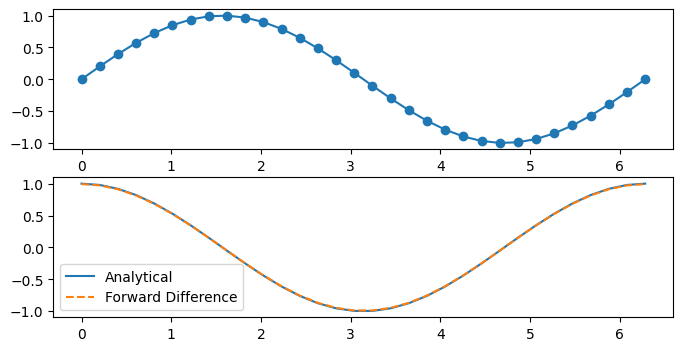

In [4]:
import numpy as np
from matplotlib import pyplot as plt

X    = np.linspace(0, 2 * np.pi, 32)
f    = lambda x: np.sin(x)
fp   = lambda x: np.cos(x)
fp_f = lambda x: fp_central(np.sin, x, X[1])

fig, axes = plt.subplots(2,1, figsize=(8, 4))

axes[0].plot(X, f(X),    'o-')
axes[1].plot(X, fp(X),   '-',  label='Analytical')
axes[1].plot(X, fp_f(X), '--', label='Forward Difference')
axes[1].legend()

In [5]:
def errs(x0):
    fp0 = np.cos(x0) # true derivative
    hs  = np.logspace(0, -15, 31) # step sizes
    errs_f = [abs(fp_forward (f, x0, h) - fp0) for h in hs]
    errs_b = [abs(fp_backward(f, x0, h) - fp0) for h in hs]
    errs_c = [abs(fp_central (f, x0, h) - fp0) for h in hs]
    return hs, errs_f, errs_b, errs_c

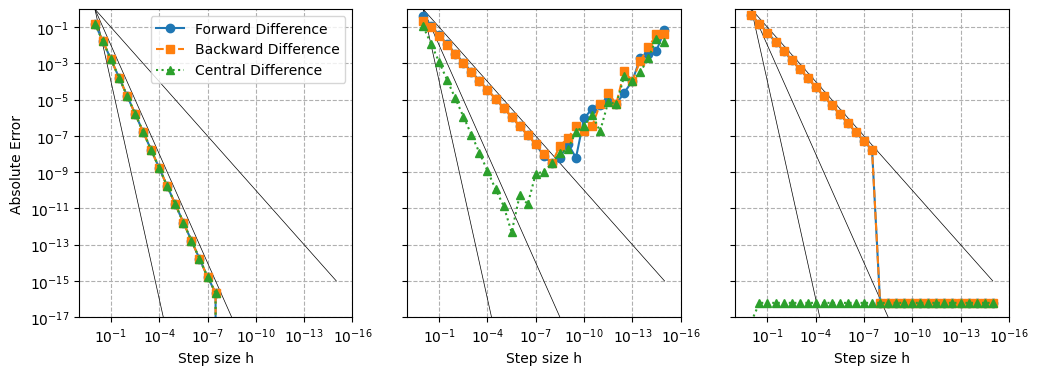

In [6]:
fig, axes = plt.subplots(1,3, figsize=(12, 4), sharey=True)

for i, x0 in enumerate([0, np.pi/4, np.pi/2]):
    hs, errs_f, errs_b, errs_c = errs(x0)

    axes[i].loglog(hs, hs,    lw=0.5, color='k')
    axes[i].loglog(hs, hs**2, lw=0.5, color='k')
    axes[i].loglog(hs, hs**4, lw=0.5, color='k')
    axes[i].loglog(hs, errs_f, 'o-',  label='Forward Difference')
    axes[i].loglog(hs, errs_b, 's--', label='Backward Difference')
    axes[i].loglog(hs, errs_c, '^:',  label='Central Difference')
    axes[i].set_xlim(1e1, 1e-16)
    axes[i].set_ylim(1e-17, 1e0)
    axes[i].set_xlabel('Step size h')
    axes[i].grid(True, which="both", ls="--")

axes[0].set_ylabel('Absolute Error')
axes[0].legend()

Why do the convergence rates do not behave as expected?

Selecting an appropriate step size $h$ is critical for minimizing the total error in finite difference approximations.
An optimal $h$ balances the reduction of truncation error with the increase in round-off error.
Empirical testing or theoretical estimates, such as $h \approx \sqrt{\epsilon}$, where $\epsilon$ is the machine epsilon, can guide the selection of $h$.
In practice, $h$ is often chosen through experimentation to achieve the best trade-off for the specific function and computational environment.

### High-Order Finite Difference Methods: Finite Difference Method of High-Order Derivatives

Finite difference methods can also be extended beyond first derivatives to approximate higher-order derivatives with increased accuracy.
One common approach to obtain a second derivative approximation involves combining two central difference formulas.

To derive the finite difference approximation for the second derivative, consider the Taylor series expansions of $f(x + h)$ and $f(x - h)$ around the point $x$:
\begin{align}
f(x + h) &= f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(x) + \mathcal{O}(h^4), \\
f(x - h) &= f(x) - h f'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{6} f'''(x) + \mathcal{O}(h^4).
\end{align}
Adding these two equations eliminates the first and third derivative terms:
\begin{align}
f(x + h) + f(x - h) = 2 f(x) + h^2 f''(x) + \mathcal{O}(h^4).
\end{align}
Rearranging the equation to solve for $f''(x)$:
\begin{align}
f''(x) \approx \frac{f(x + h) - 2 f(x) + f(x - h)}{h^2} + \mathcal{O}(h^2).
\end{align}
This yields the central difference formula for the second derivative with a truncation error of order $\mathcal{O}(h^2)$.
It requires evaluating the function at three points: $x - h$, $x$, and $x + h$.

To demonstrate the application of the central difference formula for the second derivative, consider the function $f(x) = \sin(x)$.
The true second derivative of this function is $f''(x) = -\sin(x)$.

In [7]:
def fpp_central(f, x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

def errs2(x0):
    fpp0 = -np.sin(x0) # true derivative
    hs   = np.logspace(0, -15, 31) # step sizes
    errs = [abs(fpp_central(f, x0, h) - fpp0) for h in hs]
    return hs, errs

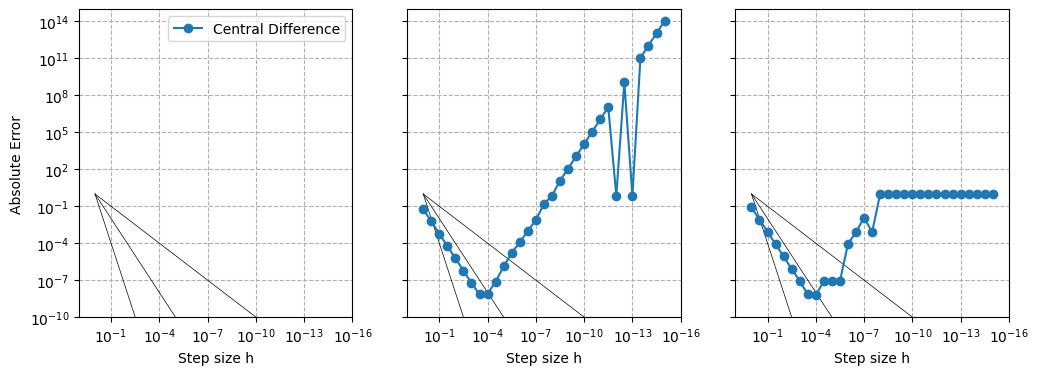

In [9]:
fig, axes = plt.subplots(1,3, figsize=(12, 4), sharey=True)

for i, x0 in enumerate([0, np.pi/4, np.pi/2]):
    hs, errs2_c = errs2(x0)
    axes[i].loglog(hs, hs,    lw=0.5, color='k')
    axes[i].loglog(hs, hs**2, lw=0.5, color='k')
    axes[i].loglog(hs, hs**4, lw=0.5, color='k')
    axes[i].loglog(hs, errs2_c, 'o-', label='Central Difference')
    axes[i].set_xlim(1e1, 1e-16)
    axes[i].set_ylim(1e-10, 1e15)
    axes[i].set_xlabel('Step size h')
    axes[i].grid(True, which="both", ls="--")

axes[0].set_ylabel('Absolute Error')
axes[0].legend()

Why do the convergence rates do not behave as expected?

### High-Order Finite Difference Methods: High-Order Scheme for Low-Order Derivatives

Finite difference methods can also be extended to achieve higher-order accuracy by incorporating more function evaluation points and carefully constructing linear combinations that cancel out lower-order error terms.
High-order finite difference schemes provide more precise derivative approximations, which are particularly beneficial in applications requiring high accuracy, such as computational fluid dynamics, structural analysis, and numerical simulations of physical systems.
This is not be confused, however, with previous section, where (low-order) finite difference methods are used to compute high-order derivatives.

To derive high-order finite difference approximations, the standard method is to use Taylor series expansion of the function around the point of interest.
By considering multiple points symmetrically distributed around the target point, it is possible to eliminate lower-order error terms, thereby increasing the accuracy of the derivative approximation.

Specifically, consider approximating the first derivative $f'(x)$ with fourth-order accuracy.
This requires that the truncation error be of order $\mathcal{O}(h^4)$, meaning that the error decreases proportionally to $h^4$ as the step size $h$ approaches zero.

Expand the function $f$ at points $x - 2h$, $x - h$, $x + h$, and $x + 2h$ using the Taylor series around $x$:
\begin{align}
f(x - 2h) &= f(x) - 2h f'(x) + \frac{(2h)^2}{2} f''(x) - \frac{(2h)^3}{6} f'''(x) + \frac{(2h)^4}{24} f''''(x) + \mathcal{O}(h^5), \\
f(x -  h) &= f(x) -  h f'(x) + \frac{  h ^2}{2} f''(x) - \frac{  h ^3}{6} f'''(x) + \frac{  h ^4}{24} f''''(x) + \mathcal{O}(h^5), \\
f(x +  h) &= f(x) +  h f'(x) + \frac{  h ^2}{2} f''(x) + \frac{  h ^3}{6} f'''(x) + \frac{  h ^4}{24} f''''(x) + \mathcal{O}(h^5), \\
f(x + 2h) &= f(x) + 2h f'(x) + \frac{(2h)^2}{2} f''(x) + \frac{(2h)^3}{6} f'''(x) + \frac{(2h)^4}{24} f''''(x) + \mathcal{O}(h^5).
\end{align}

We will construct linear combinations of these expansions to eliminate the lower-order terms up to $h^3$.
For example, subtract the expansion at $x - 2h$ from that at $x + 2h$ and adjust coefficients to isolate $f'(x)$:
\begin{align}
f(x + 2h) - f(x - 2h) &= 4h f'(x) + \frac{8h^3}{3} f'''(x) + \mathcal{O}(h^5), \\
f(x +  h) - f(x -  h) &= 2h f'(x) + \frac{h^3}{3} f'''(x) + \mathcal{O}(h^5).
\end{align}
It is now straightforward to eliminate the $f'''(x)$ term:
\begin{align}
-f(x + 2h) + f(x - 2h) + 8f(x + h) - 8f(x - h) = 12h f'(x)  + \mathcal{O}(h^5).
\end{align}
Solving for $f'(x)$:
\begin{align}
f'(x) \approx \frac{-f(x + 2h) + 8f(x + h) - 8f(x - h) + f(x - 2h)}{12h} + \mathcal{O}(h^4).
\end{align}
This leads to the fourth-order central difference formula for the first derivative.

In [10]:
def fp_central4(f, x, h):
    return (-f(x+2*h) + 8*f(x+h) - 8*f(x-h) + f(x-2*h))/(12*h)

def errs4(x0):
    fp0 = np.cos(x0) # true derivative
    hs  = np.logspace(0, -15, 31) # step sizes
    errs_c4 = [abs(fp_central4(f, x0, h) - fp0) for h in hs]
    return hs, errs_c4

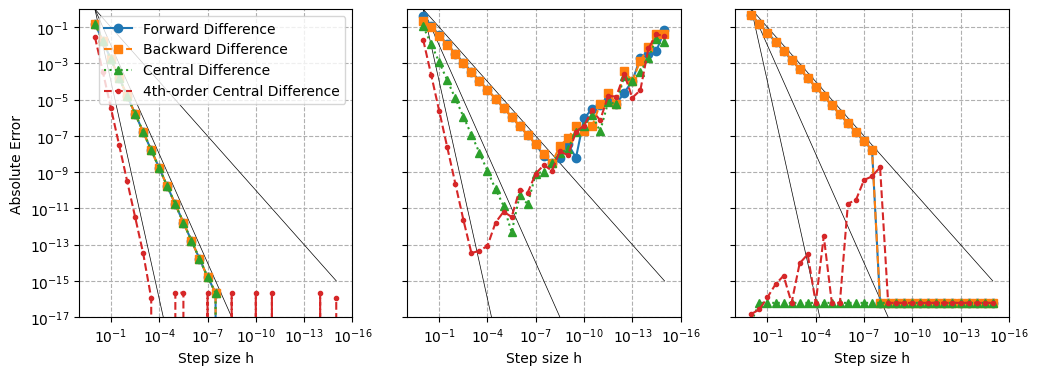

In [11]:
fig, axes = plt.subplots(1,3, figsize=(12, 4), sharey=True)

for i, x0 in enumerate([0, np.pi/4, np.pi/2]):
    hs, errs_f, errs_b, errs_c = errs(x0)
    hs, errs_c4                = errs4(x0)
    axes[i].loglog(hs, hs,    lw=0.5, color='k')
    axes[i].loglog(hs, hs**2, lw=0.5, color='k')
    axes[i].loglog(hs, hs**4, lw=0.5, color='k')
    axes[i].loglog(hs, errs_f,  'o-',  label='Forward Difference')
    axes[i].loglog(hs, errs_b,  's--', label='Backward Difference')
    axes[i].loglog(hs, errs_c,  '^:',  label='Central Difference')
    axes[i].loglog(hs, errs_c4, '.--', label='4th-order Central Difference')
    axes[i].set_xlim(1e1, 1e-16)
    axes[i].set_ylim(1e-17, 1e0)
    axes[i].set_xlabel('Step size h')
    axes[i].grid(True, which="both", ls="--")

axes[0].set_ylabel('Absolute Error')
axes[0].legend()

Does the convergence rate of the 4th-order central difference behave as expected?

Coefficients of high-order fininte difference for computing low order derivatives have been worked out.
One may implementing them simply by following [tables](https://en.wikipedia.org/wiki/Finite_difference_coefficient).
Nevertheless, it is unusal to go above 6th-order.

### Spectral Derivatives

Spectral methods are a class of high-accuracy numerical techniques used to approximate derivatives by representing functions in terms of global basis functions.
Unlike finite difference methods, which rely on local information, spectral methods utilize the entire domain's information, enabling exponential convergence rates for sufficiently smooth functions.

Fourier spectral methods leverage the Fourier series representation of periodic functions to compute derivatives with high precision.
The fundamental idea is to transform the function into the frequency domain, where differentiation becomes a straightforward algebraic operation.

For a function  f(x)  defined on a periodic interval  [L/2, L/2), the Fourier series expansion is given by:
\begin{align}
f(x) = \sum_{n=-N/2}^{N/2} F_n e^{i 2\pi n x / L} \equiv \sum_{n=-N/2}^{N/2} F_k e^{i k_n x},
\end{align}
where $N$ is the number of modes, $F_n$ are the Fourier coefficients, and $k_n \equiv 2\pi n/L$ are the wavenumbers.

Differentiation of $f(x)$ in the spatial domain corresponds to multiplication by $i k_n$ in the frequency domain.
Specifically, the first derivative $f'(x$) is:
\begin{align}
f'(x) = \sum_{k=-N/2}^{N/2} i k_n F_k e^{i k_n x}.
\end{align}
This property simplifies the computation of derivatives, as it converts the differentiation process into a simple multiplication operation in the Fourier space.

Consider computing the first derivative of $f(x) = \sin(x)$ on the domain $[-\pi, \pi)$:

In [ ]:
# Number of modes
N = 64

# Domain
L = 2 * np.pi
x = np.linspace(-L/2, L/2, N, endpoint=False)

def fp_spectral(func, x):
    f  = func(x)
    F  = np.fft.fft(f)
    k  = 2 * np.pi * np.fft.fftfreq(len(x), d=x[1]-x[0])

    # Multiply by ik to get derivative in frequency domain
    Fp = 1j * k * F

    # Inverse Fourier transform to get derivative in spatial domain
    return np.fft.ifft(Fp).real

# Spectral derivative
fp  = fp_spectral(np.sin, x)

# True derivative
fp0 = np.cos(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, fp,  'ro--', label='Spectral Derivative')
plt.plot(x, fp0, 'b.-',  label='True Derivative')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title('Fourier Spectral Derivative of sin(2πx)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Ns     = 2**np.arange(1,10)
errs_s = []
for N in Ns:
    x   = np.linspace(-L/2, L/2, N, endpoint=False)
    fp  = fp_spectral(np.sin, x)
    fp0 = np.cos(x)
    dfp = fp - fp0
    err = np.sqrt(np.mean(dfp*dfp))
    errs_s.append(err)

In [ ]:
plt.loglog(Ns, errs_s, 'o-')
plt.xlabel('Number of samples N')
plt.ylabel('RMS error')
plt.grid(True, which="both", ls="--")

* How should we interpret this convergence plot?
* What if we change the function to, e.g., a Gaussian?
* How about Lorentzian $1/(1+x^2)$?
* Does the domain matter?

### Complex Step Differentiation

The Complex Step Method provides an innovative approach to numerical differentiation by evaluating the function at a complex-valued point.
Unlike finite difference methods, which approximate derivatives using real-valued perturbations and suffer from subtractive cancellation errors, the Complex Step Method utilizes an imaginary perturbation to extract derivative information directly from the imaginary component of the function's output.
This technique achieves high accuracy without the need for extremely small step sizes, thereby avoiding the numerical instability associated with finite differences.
In astrophysics, this method was first used in numerical relativity to mitigate the stability of solving Einstein's field equation.

The foundation of the Complex Step Method lies in the application of complex analysis to differentiation.
Consider a real-valued function $f(x)$ that is analytic (i.e., differentiable) in a neighborhood around a point $x$.
By introducing a small imaginary perturbation $ih$ to the input, where $h$ is a real step size and $i$ is the imaginary unit, we can express the function as:
\begin{align}
f(x + ih) = f(x) + ih f'(x) - \frac{h^2}{2} f''(x) - i \frac{h^3}{6} f''(x) + \cdots
\end{align}
The key insight is that the imaginary part of $f(x + ih)$ is directly proportional to the first derivative $f'(x)$:
\begin{align}
\operatorname{Im}[f(x + ih)] = h f'(x) + \mathcal{O}(h^3)
\end{align}

By isolating the imaginary component and dividing by $h$, we obtain an approximation for the first derivative:
\begin{align}
f'(x) \approx \frac{\operatorname{Im}[f(x + ih)]}{h}
\end{align}

Subtractive cancellation errors arise in finite difference approximations when two nearly equal real numbers are subtracted, leading to a significant loss of precision.
For example, in the central difference formula:
\begin{align}
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}
\end{align}
if $h$ is very small, $f(x + h)$ and $f(x - h)$ become nearly identical, and their difference is subject to floating-point round-off errors. This limits the accuracy of the derivative approximation.

In contrast, the Complex Step Method avoids this issue by perturbing the input in the imaginary direction.
The derivative information is captured in the imaginary part, which is not subject to the same precision loss.
As a result, the Complex Step Method can achieve derivative approximations accurate to machine precision without requiring excessively small step sizes.

In [7]:
def fp_complexstep(f, x, h):
    return np.imag(f(x + 1j * h)) / h

def errscs(x0):
    fp0 = np.cos(x0) # true derivative
    hs  = np.logspace(0, -15, 31) # step sizes
    errs_c4 = [abs(fp_complexstep(f, x0, h) - fp0) for h in hs]
    return hs, errs_c4

NameError: name 'errs4' is not defined

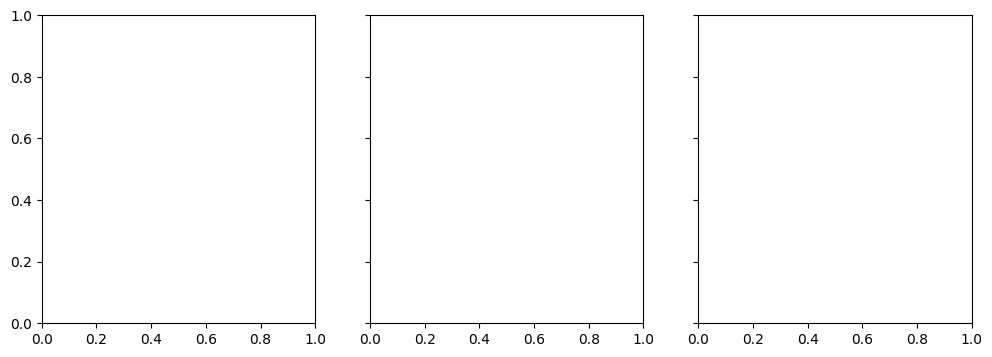

In [8]:
fig, axes = plt.subplots(1,3, figsize=(12, 4), sharey=True)

for i, x0 in enumerate([0, np.pi/4, np.pi/2]):
    hs, errs_f, errs_b, errs_c = errs(x0)
    hs, errs_c4                = errs4(x0)
    hs, errs_cs                = errscs(x0)
    axes[i].loglog(hs, hs,    lw=0.5, color='k')
    axes[i].loglog(hs, hs**2, lw=0.5, color='k')
    axes[i].loglog(hs, hs**4, lw=0.5, color='k')
    axes[i].loglog(hs, errs_c,  '^:',  label='Central Difference')
    axes[i].loglog(hs, errs_c4, '.--', label='4th-order Central Difference')
    axes[i].loglog(hs, errs_cs, '.--', label='Complex Step Differentiation')
    axes[i].set_xlim(1e1, 1e-16)
    axes[i].set_ylim(1e-30, 1e0)
    axes[i].set_xlabel('Step size h')
    axes[i].grid(True, which="both", ls="--")

axes[0].set_ylabel('Absolute Error')
axes[2].legend()

* What is the convergent rate of Complex Step Differentiation?
* Is it really better than finite difference?

## Automatic Differentiation

Automatic Differentiation (AD) is a computational technique that enables the precise and efficient calculation of derivatives of functions, leveraging the chain rule of calculus at the elementary operation level.
Unlike symbolic differentiation, which manipulates mathematical expressions to find exact derivatives, and numerical differentiation, which approximates derivatives using finite differences, AD provides exact derivatives up to machine precision without the complexity and computational overhead associated with symbolic methods.

### Introduction to Automatic Differentiation

Automatic Differentiation (AD) is motivated by the need for accurate and efficient derivative computation, especially in complex, high-dimensional applications such as machine learning, optimization, and scientific computing.
Traditional numerical methods, like finite differences, balance step size and approximation error, leading to inaccuracies from truncation and round-off errors.
Symbolic differentiation, while exact, can be computationally infeasible for large-scale problems due to expression growth and memory demands.

AD bridges the gap between these approaches by applying differentiation rules directly to each operation in a function's computational graph.
By breaking functions into elementary operations and applying the chain rule, AD calculates derivatives with precision and efficiency, making it indispensable in fields where gradient information is essential, such as deep learning and physics-informed modeling.

AD operates in two main modes: forward mode and reverse mode, each suited to different types of problems.

### Dual Numbers and Forward Mode AD

In forward mode AD, dual numbers provide a practical and intuitive way to propagate derivative information alongside function values.
Dual numbers extend real numbers by introducing an additional component representing an infinitesimal value, enabling simultaneous calculation of function values and their derivatives.
A dual number is represented as:
\begin{align}
\tilde{x} = x + \delta x',
\end{align}
where $x$ is the real part, $x'$ is the dual part representing the derivative, and $\delta$ is an infinitesimal quantity satisfying $\delta^2 = 0$.

The algebra of dual numbers follows standard arithmetic rules with the additional property that $\delta^2 = 0$.
This property allows for the linear extraction of derivative information without higher-order terms interfering.
Note that [exterior calculus](https://en.wikipedia.org/wiki/Differential_form) requires $d^2 = 0$.
This is the same algebraic rule as dual number.

Dual numbers follow standard arithmetic rules but with the additional property $\delta^2 = 0$, which makes it possible to compute derivatives without higher-order terms.
This approach mirrors forward mode AD's method of applying the chain rule step-by-step through the computation, storing both the value and its derivative for each operation.
Forward mode is particularly efficient when there are few input variables (such as when calculating the gradient of a function with one input and multiple outputs).

### Example: Differentiating $f(x) = x^2$

Consider the function $f(x) = x^2$. Using dual numbers:
\begin{align}
\tilde{x} &= x + \delta, \\
\tilde{f}(\tilde{x}) &= (x + \delta)^2 = x^2 + 2x\delta + \delta^2 = x^2 + 2x\delta.
\end{align}
Since $\delta^2 = 0$, the dual part of $\tilde{f}(\tilde{x})$ is $2x$, which is the derivative $f'(x)$.

By replacing each real input with a dual number, forward mode AD propagates derivative information automatically through computation.
This approach provides exact derivatives up to machine precision, avoiding the approximation errors of finite differences.

### Implementing Autodiff with Dual Numbers

To implement forward mode AD in Python, we can define a `Dual` class that overrides arithmetic operations to handle both the value and derivative parts.
Additionally, we introduce helper functions `V(x)` and `D(x)` to extract the value and derivative from Dual Numbers or regular numerical inputs.

In [9]:
def V(x):
    """Select the value from a dual number.

    Work for both python built-in numbers (often used in function) and dual numbers.
    """
    if isinstance(x, Dual):
        return x[0]
    else:
        return x

def D(x):
    """Select the derivative from a dual number.

    Work for both python built-in numbers (often used in function) and dual numbers.
    """
    if isinstance(x, Dual):
        return x[1]
    else:
        return 0

In [10]:
class Dual(tuple):
    """Dual number for implementing autodiff in pure python"""

    def __new__(self, v, d=1): # tuple is immutable so we cannot use __init__()
        return tuple.__new__(Dual, (v, d))

    def __add__(self, r):
        return Dual(
            V(self) + V(r),
            D(self) + D(r),
        )
    def __radd__(self, l):
        return self + l # addition commutes

    def __sub__(self, r):
        return Dual(
            V(self) - V(r),
            D(self) - D(r),
        )
    def __rsub__(self, l):
        return Dual(
            V(l) - V(self),
            D(l) - D(self),
        )

    def __mul__(self, r):
        return Dual(
            V(self) * V(r),
            D(self) * V(r) + V(self) * D(r),
        )
    def __rmul__(self, l):
        return self * l # multiplication commutes

    def __truediv__(self, r):
        return Dual(
            V(self) / V(r),
            ..., # leave as lab
        )
    def __rtruediv__(self, l):
        return Dual(
            V(l) / V(self),
            ..., # leave as lab
        )

    def __pow__(self, r): # assume r is constant
        if r == 0:
            return ... # leave as lab
        elif r == 1:
            return ... # leave as lab
        else:
            return Dual(
                V(self)**r,
                ..., # leave as lab
            )

That's it!
We've implemented (a limited version of) autodiff in pure python!

To validate our Dual Number implementation, we define a simple function and compute its derivative using AD.
Consider the function $f(x) = x + x^2$.
We evaluate this function using Dual Numbers and plot both the function and its derivative.

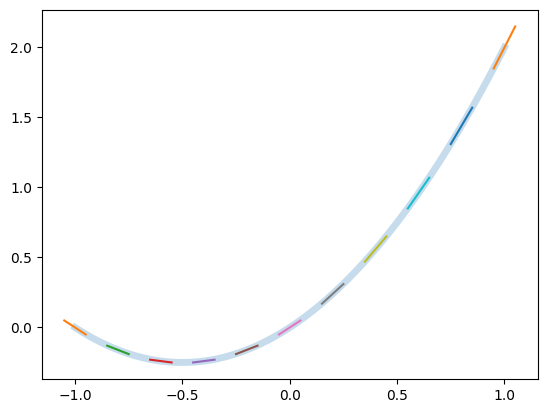

In [11]:
def f(x):
    return x + x*x

X     = np.linspace(-1,1,num=11)
F, Fp = f(Dual(X))

Xd = np.linspace(min(X), max(X), num=1001)
Fd = [f(x) for x in Xd]
    
plt.plot(Xd, Fd, lw=5, alpha=0.25)
for (x, fp) in zip(X, Fp):
    y = f(x)
    plt.plot(
        [x-0.05,    x+0.05],
        [y-0.05*fp, y+0.05*fp],
    )

The initial implementation of the Dual class handles basic arithmetic operations.
However, to support more complex functions such as trigonometric functions, we need to define additional operations that correctly propagate derivative information.
This can be achieved by implementing helper functions that operate on Dual Numbers.

In [12]:
def sin(x):
    return Dual(
        np.sin(V(x)),
        np.cos(V(x)) * D(x)  # chain rule: d/dx sin(x) = cos(x) * x'
    )

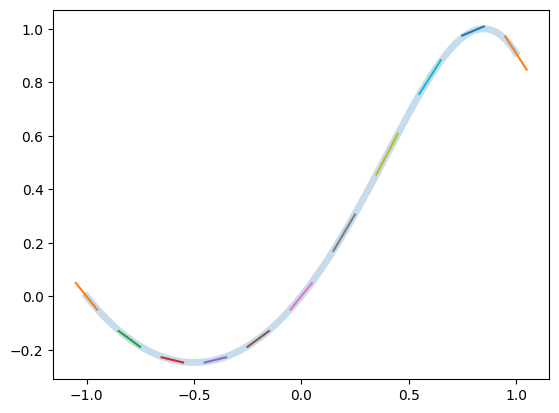

In [13]:
def f(x):
    return sin(x + x*x)

X = np.linspace(-1, 1, 1001)
F, Fp = f(Dual(X))

plt.plot(X, F, lw=5, alpha=0.25)
for (x, f, fp) in list(zip(X, F, Fp))[::100]:
    plt.plot(
        [x-0.05,    x+0.05],
        [f-0.05*fp, f+0.05*fp],
    )

### Connection to Complex Step Method

The Dual Number formulation is conceptually similar to the Complex Step Method discussed earlier.
Both techniques add an additional component to capture derivative information accurately without introducing significant numerical errors.

Consider the above example $f(x) = x^2$.
In the Complex Step Method, the function is evaluated at a complex point $x + ih$, where $h$ is a small step size and $i$ is the imaginary unit:
\begin{align}
f(x + ih) = (x + ih)^2 = x^2 - h^2 + 2ihx.
\end{align}
By isolating the imaginary part and dividing by $h$, we obtain an approximation of the derivative:
\begin{align}
f'(x) \approx \frac{\operatorname{Im}[f(x + ih)]}{h} = 2x.
\end{align}

In this example, the imaginary part directly corresponds to the derivative, mirroring the Dual Number approach where the dual component carries derivative information.
The real part contains an extra term $-h^2$, which becomes negligible when $h$ is sufficiently small.
Specifically, by choosing $h < \sqrt{\epsilon}$ (recalling $\epsilon$ is the machine precision), the term $-h^2$ effectively vanishes due to round off erroir in finite precision arithmetic.

This demonstrates that when $h$ is appropriately small, the Complex Step Method effectively reduces to the Dual Number formulation, providing an exact derivative within the limits of machine precision.
Both methods avoid the subtractive cancellation errors inherent in traditional finite difference approaches by utilizing an augmented input.
Dual numbers use an infinitesimal component, while the Complex Step Method employs a small imaginary perturbation.
This connection demostrates how both techniques achieve high-accuracy derivative computations by embedding derivative information directly into the evaluation process.

### Reverse Mode AD

While forward mode AD, implemented through dual numbers, is efficient for functions with few inputs, reverse mode AD is more suitable for functions with many inputs and a single output.
Reverse mode AD computes derivatives by tracing the computational graph in reverse, calculating the gradient with respect to all inputs in a single backward pass.
This makes it highly effective for machine learning models, where the goal is often to compute derivatives with respect to numerous parameters (such as weights in neural networks).

In practice, reverse mode AD requires tracking the computational graph of operations from inputs to outputs, storing intermediate values for each operation.
This graph is then traversed in reverse during the backpropagation process, systematically applying the chain rule to compute gradients.
Modern machine learning frameworks (e.g., `TensorFlow`, `PyTorch`, and `JAX`) utilize reverse mode AD to optimize models with many parameters, leveraging memory-efficient strategies like checkpointing to handle large-scale models.

### Autodiff (and Vectorization and JIT) in Python with JAX

[`JAX`](https://jax.readthedocs.io/en/latest/) is a high-performance numerical computing library developed by Google that provides powerful tools for AD.
It extends NumPy with the ability to automatically compute gradients, making it particularly useful in machine learning, optimization, and scientific computing applications.
`JAX` combines the ease of use of NumPy with the efficiency of Just-In-Time (JIT) compilation, enabling rapid and scalable computations.
Key Features of JAX includes:

* Automatic Differentiation: JAX supports both forward and reverse mode AD, allowing for efficient computation of gradients, Jacobians, and Hessians.
* JIT Compilation: Utilizing XLA (Accelerated Linear Algebra), JAX can compile and optimize numerical code for faster execution on CPUs and GPUs.
* Composability: JAX's functional programming paradigm allows users to compose complex transformations seamlessly.
* Interoperability: JAX integrates smoothly with existing NumPy code, requiring minimal changes to leverage its advanced features.

To begin using JAX, ensure it is installed in your Python environment.
You can install JAX via pip: `pip install --upgrade "jax[cpu]"`.

Let's demonstrate how to use JAX to compute the derivative of a function.
We'll use the function $f(x) = \sin(x + x^2)$, combining our previous Dual Number examples.

In [14]:
! pip install jax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 MB 54.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 51.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


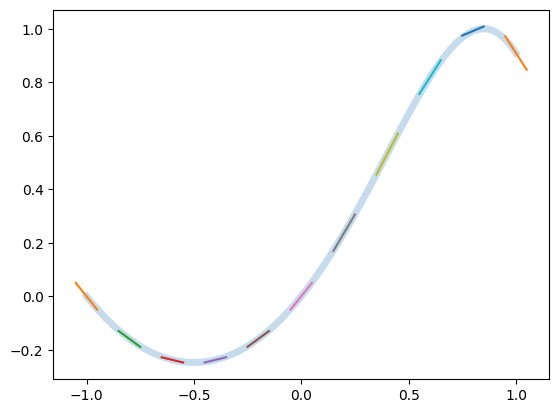

In [8]:
from jax import numpy as jnp, grad, vmap

def f(x):
    return jnp.sin(x + x*x)

X  = jnp.linspace(-1,1,num=101)
F  = f(X)
Fp = vmap(grad(f))(X)

plt.plot(X, F, lw=5, alpha=0.25)
for (x, f, fp) in list(zip(X, F, Fp))[::10]:
    plt.plot(
        [x-0.05,    x+0.05],
        [f-0.05*fp, f+0.05*fp],
    )

## Summary

Differentiation is a fundamental tool in mathematics, science, and engineering, essential for function analysis and optimization.
Primary methods include Symbolic Differentiation, Numerical Differentiation, and AD, each with unique strengths and limitations.

Symbolic Differentiation provides exact analytical derivatives, ideal for theoretical insights, but struggles with complexity and memory demands for large-scale functions due to expression swell.
Numerical Differentiation approximates derivatives using finite differences, offering simplicity and flexibility but often limited by truncation and round-off errors, requiring careful step-size management for stability.

Automatic Differentiation bridges symbolic and numerical methods by calculating exact derivatives up to machine precision through systematic application of the chain rule in a function's computational graph.
Forward Mode AD, often implemented with Dual Numbers, is efficient for functions with few inputs, while Reverse Mode AD is well-suited for functions with many inputs and a single output, such as in neural network training via backpropagation.
Though highly accurate, AD can be memory-intensive, especially in large-scale applications, and may encounter issues with non-differentiable functions and dynamic control flows.

Comparing these methods:

* Symbolic Differentiation is exact but computationally intensive for complex functions.
* Numerical Differentiation is accessible but prone to approximation errors.
* Automatic Differentiation combines precision and efficiency, making it indispensable in machine learning and optimization but challenging to scale efficiently.
* Complex Step Differentiation address the round off error problem of Numerical Differentiation, and is numerically identical to the Dual number formulation in forward AD with small enough complex step $ih$.

Future research is focused on improving the scalability of AD for large models, supporting higher-order derivatives (e.g., Jacobians, Hessians), and better managing non-differentiable functions and dynamic graphs.
Hybrid approaches combining symbolic, numerical, and automatic differentiation could provide more robust solutions.

For further exploration:

* [SymPy Documentations](https://www.sympy.org/en/index.html)
* [Numerical Recipes](https://numerical.recipes/)
* [JAX Documentations](https://jax.readthedocs.io/en/latest/)